# Getting started with Python Machine Learning 

                                                                                    By Bisheshwor Neupane
                                                                                    ROll no. : 35
                                                                                    BCE

Let's take a look at a hypothetical web start-up, MLaaS, which sells the
service of providing machine learning algorithms via HTTP. With the increasing success of this
company, the demand for better infrastructure also increases so that we can serve all incoming
web requests successfully. We don't want to allocate too many resources as that would be too
costly. On the other hand, we will lose money if we have not reserved enough resources to serve
all incoming requests. Now, the question is, when will we hit the limit of our current
infrastructure, which we estimated to have a capacity of about 100,000 requests per hour? We
would like to know in advance when we have to request additional servers in the cloud to serve
all the incoming requests successfully without paying for unused ones.

In [1]:
!pip install numpy scipy matplotlib 

Defaulting to user installation because normal site-packages is not writeable


# Introduction to NumPy, SciPy, and Matplotlib 

In [2]:
import numpy as np
np.version.full_version

'1.20.3'

In [3]:
a = np.array([0,1,2,3,4,5])
a

array([0, 1, 2, 3, 4, 5])

In [4]:
a.ndim

1

In [5]:
a.shape

(6,)

In [6]:
b = a.reshape((3,2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
b.ndim

2

In [8]:
b.shape

(3, 2)

In [9]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [10]:
a

array([ 0,  1, 77,  3,  4,  5])

In [11]:
c = a.reshape((3,2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [12]:
c[0][0] = -99
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [13]:
a

array([ 0,  1, 77,  3,  4,  5])

In [14]:
d = np.array([1,2,3,4,5])
d*2

array([ 2,  4,  6,  8, 10])

In [15]:
d**2

array([ 1,  4,  9, 16, 25])

In [16]:
[1,2,3,4,5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [17]:
try:
    [1,2,3,4,5]**2 # does not work on normal lists
except TypeError as e:
    print("Exception: %s"%e)

Exception: unsupported operand type(s) for ** or pow(): 'list' and 'int'


# Indexing

In [18]:
a[np.array([2,3,4])]

array([77,  3,  4])

In [19]:
a[[2,3,4]] # normal lists work, too

array([77,  3,  4])

In [20]:
a>4

array([False, False,  True, False, False,  True])

In [21]:
a[a>4] = 4
a

array([0, 1, 4, 3, 4, 4])

In [22]:
a.clip(0,4)

array([0, 1, 4, 3, 4, 4])

Handling Nan Values

# Handling nonexistent values

In [23]:
c = np.array([1, 2, np.NAN, 3, 4]) # let's pretend we have read this from a text file
c

array([ 1.,  2., nan,  3.,  4.])

In [24]:
np.isnan(c)

array([False, False,  True, False, False])

In [25]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [26]:
np.mean(c[~np.isnan(c)])

2.5

# Comparing the runtime

In [27]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',
                              number=10000)
naive_np_sec = timeit.timeit(
                'sum(na*na)',
                setup="import numpy as np; na=np.arange(1000)",
                number=10000)
good_np_sec = timeit.timeit(
                'na.dot(na)',
                setup="import numpy as np; na=np.arange(1000)",
                number=10000)

print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 0.689645 sec
Naive NumPy: 0.810159 sec
Good NumPy: 0.012592 sec


In [28]:
print("Speed-up: %f" % (normal_py_sec / good_np_sec))

Speed-up: 54.769956


In [29]:
1.621358/0.035686

45.43400773412542

In [30]:
a = np.array([1,2,3])
a.dtype

dtype('int64')

In [31]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U21')

In [32]:
np.array([1, "stringy", {1, 2, 3}])

array([1, 'stringy', {1, 2, 3}], dtype=object)

# Learning SciPy

In [33]:
import scipy
scipy.version.full_version

'1.7.1'

# Reading in the data

In [34]:
data = np.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print(data[:10])

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]]


In [35]:
print(data.shape)

(743, 2)


# Preprocessing and cleaning the data

In [36]:
x = data[:,0]
y = data[:,1]

In [37]:
np.sum(np.isnan(y))

8

In [38]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

In [39]:
import os
from scipy.stats import gamma
import matplotlib.pyplot as plt
%matplotlib inline

DATA_DIR = os.path.join(os.getcwd(), "data")
CHART_DIR = os.path.join(os.getcwd(), "charts")

for d in [DATA_DIR, CHART_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)

np.random.seed(3)  # to reproduce the data later on

def gen_web_traffic_data():
    '''
    This function generates some fake data that first shows a weekly pattern 
    for a couple weeks before it grows exponentially.
    '''
    x = np.arange(1, 31*24)
    y = np.array(200*(np.sin(2*np.pi*x/(7*24))), dtype=np.float32)
    y += gamma.rvs(15, loc=0, scale=100, size=len(x))
    y += 2 * np.exp(x/100.0)
    y = np.ma.array(y, mask=[y<0])

    # We introduce some "real-world" data, to later demonstrate how to clean 
    # it conveniently.
    y[[2,23,48,95,154,180,181,210]] = np.nan

    return x, y

def plot_web_traffic(x, y, models=None, mx=None, ymax=None, fig_idx=None):
    '''
    Plot the web traffic (y) over time (x). 
    
    If models is given, it is expected to be a list fitted models,
    which will be plotted as well (used later in this chapter).
    '''
    plt.figure(figsize=(12,6), dpi=300) # width and height of the plot in inches
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(20)], 
               ['week %i' %w for w in range(20)])
    
    if models:
        colors = ['g', 'k', 'b', 'm', 'r']
        linestyles = ['-', '-.', '--', ':', '-']

        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
        
    plt.autoscale()
    if ymax:
        plt.ylim(ymax=ymax)

    plt.grid()
    plt.ylim(ymin=0)
    
    if fig_idx is not None:
        plt.savefig(os.path.join(CHART_DIR, "B09124_01_%s.png" % fig_idx))


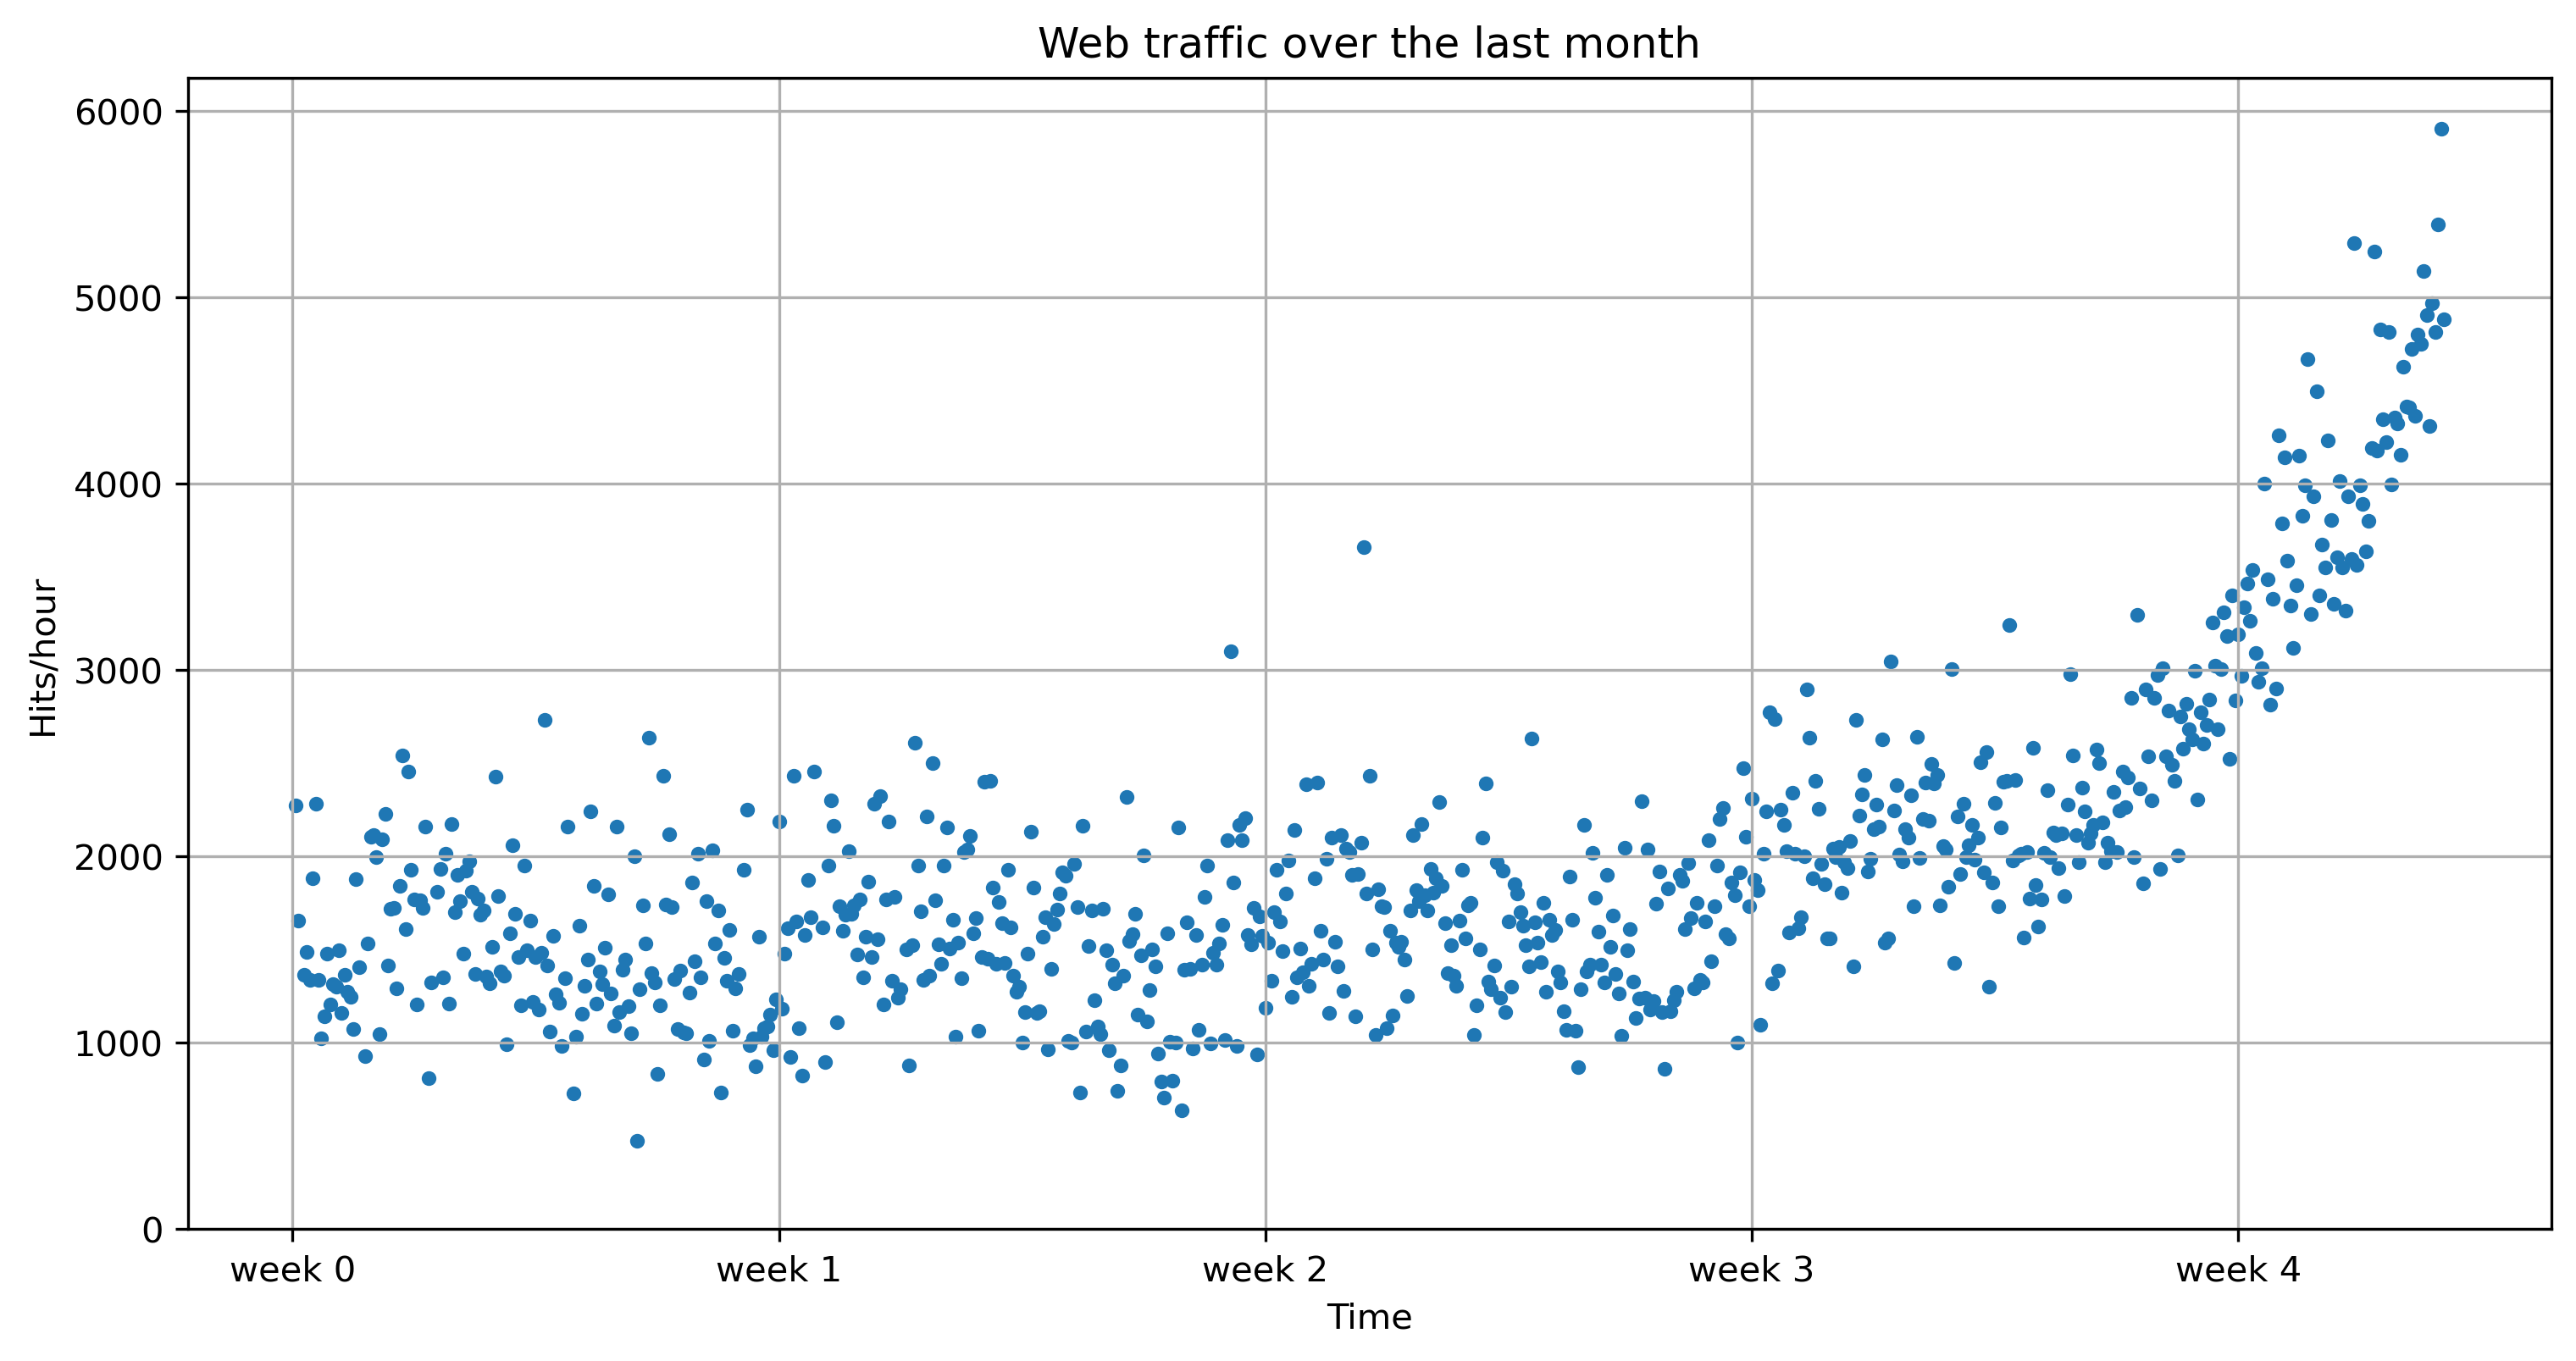

In [40]:


x, y = gen_web_traffic_data()
np.savetxt(os.path.join(DATA_DIR, "web_traffic.tsv"), 
           list(zip(x, y)), delimiter="\t", fmt="%f")
    
plot_web_traffic(x, y, fig_idx="01")



# Choosing the right model and learning algorithm

In [41]:
data = np.genfromtxt(os.path.join(DATA_DIR, "web_traffic.tsv"), delimiter="\t")

In [42]:
print(data[:10])

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]]


In [43]:
print(data.shape)

(743, 2)


In [44]:
np.sum(np.isnan(x))

0

In [45]:
np.sum(np.isnan(y)) # this is the dirt that we introduced above

8

In [46]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

# Starting with a simple straight line

In [47]:
fp1 = np.polyfit(x, y, 1)

In [48]:
print("Model parameters: %s" % fp1)

Model parameters: [  2.58462016 996.50674246]


In [49]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

In [50]:
f1 = np.poly1d(fp1)
print(error(f1, x, y))

319531507.00812596


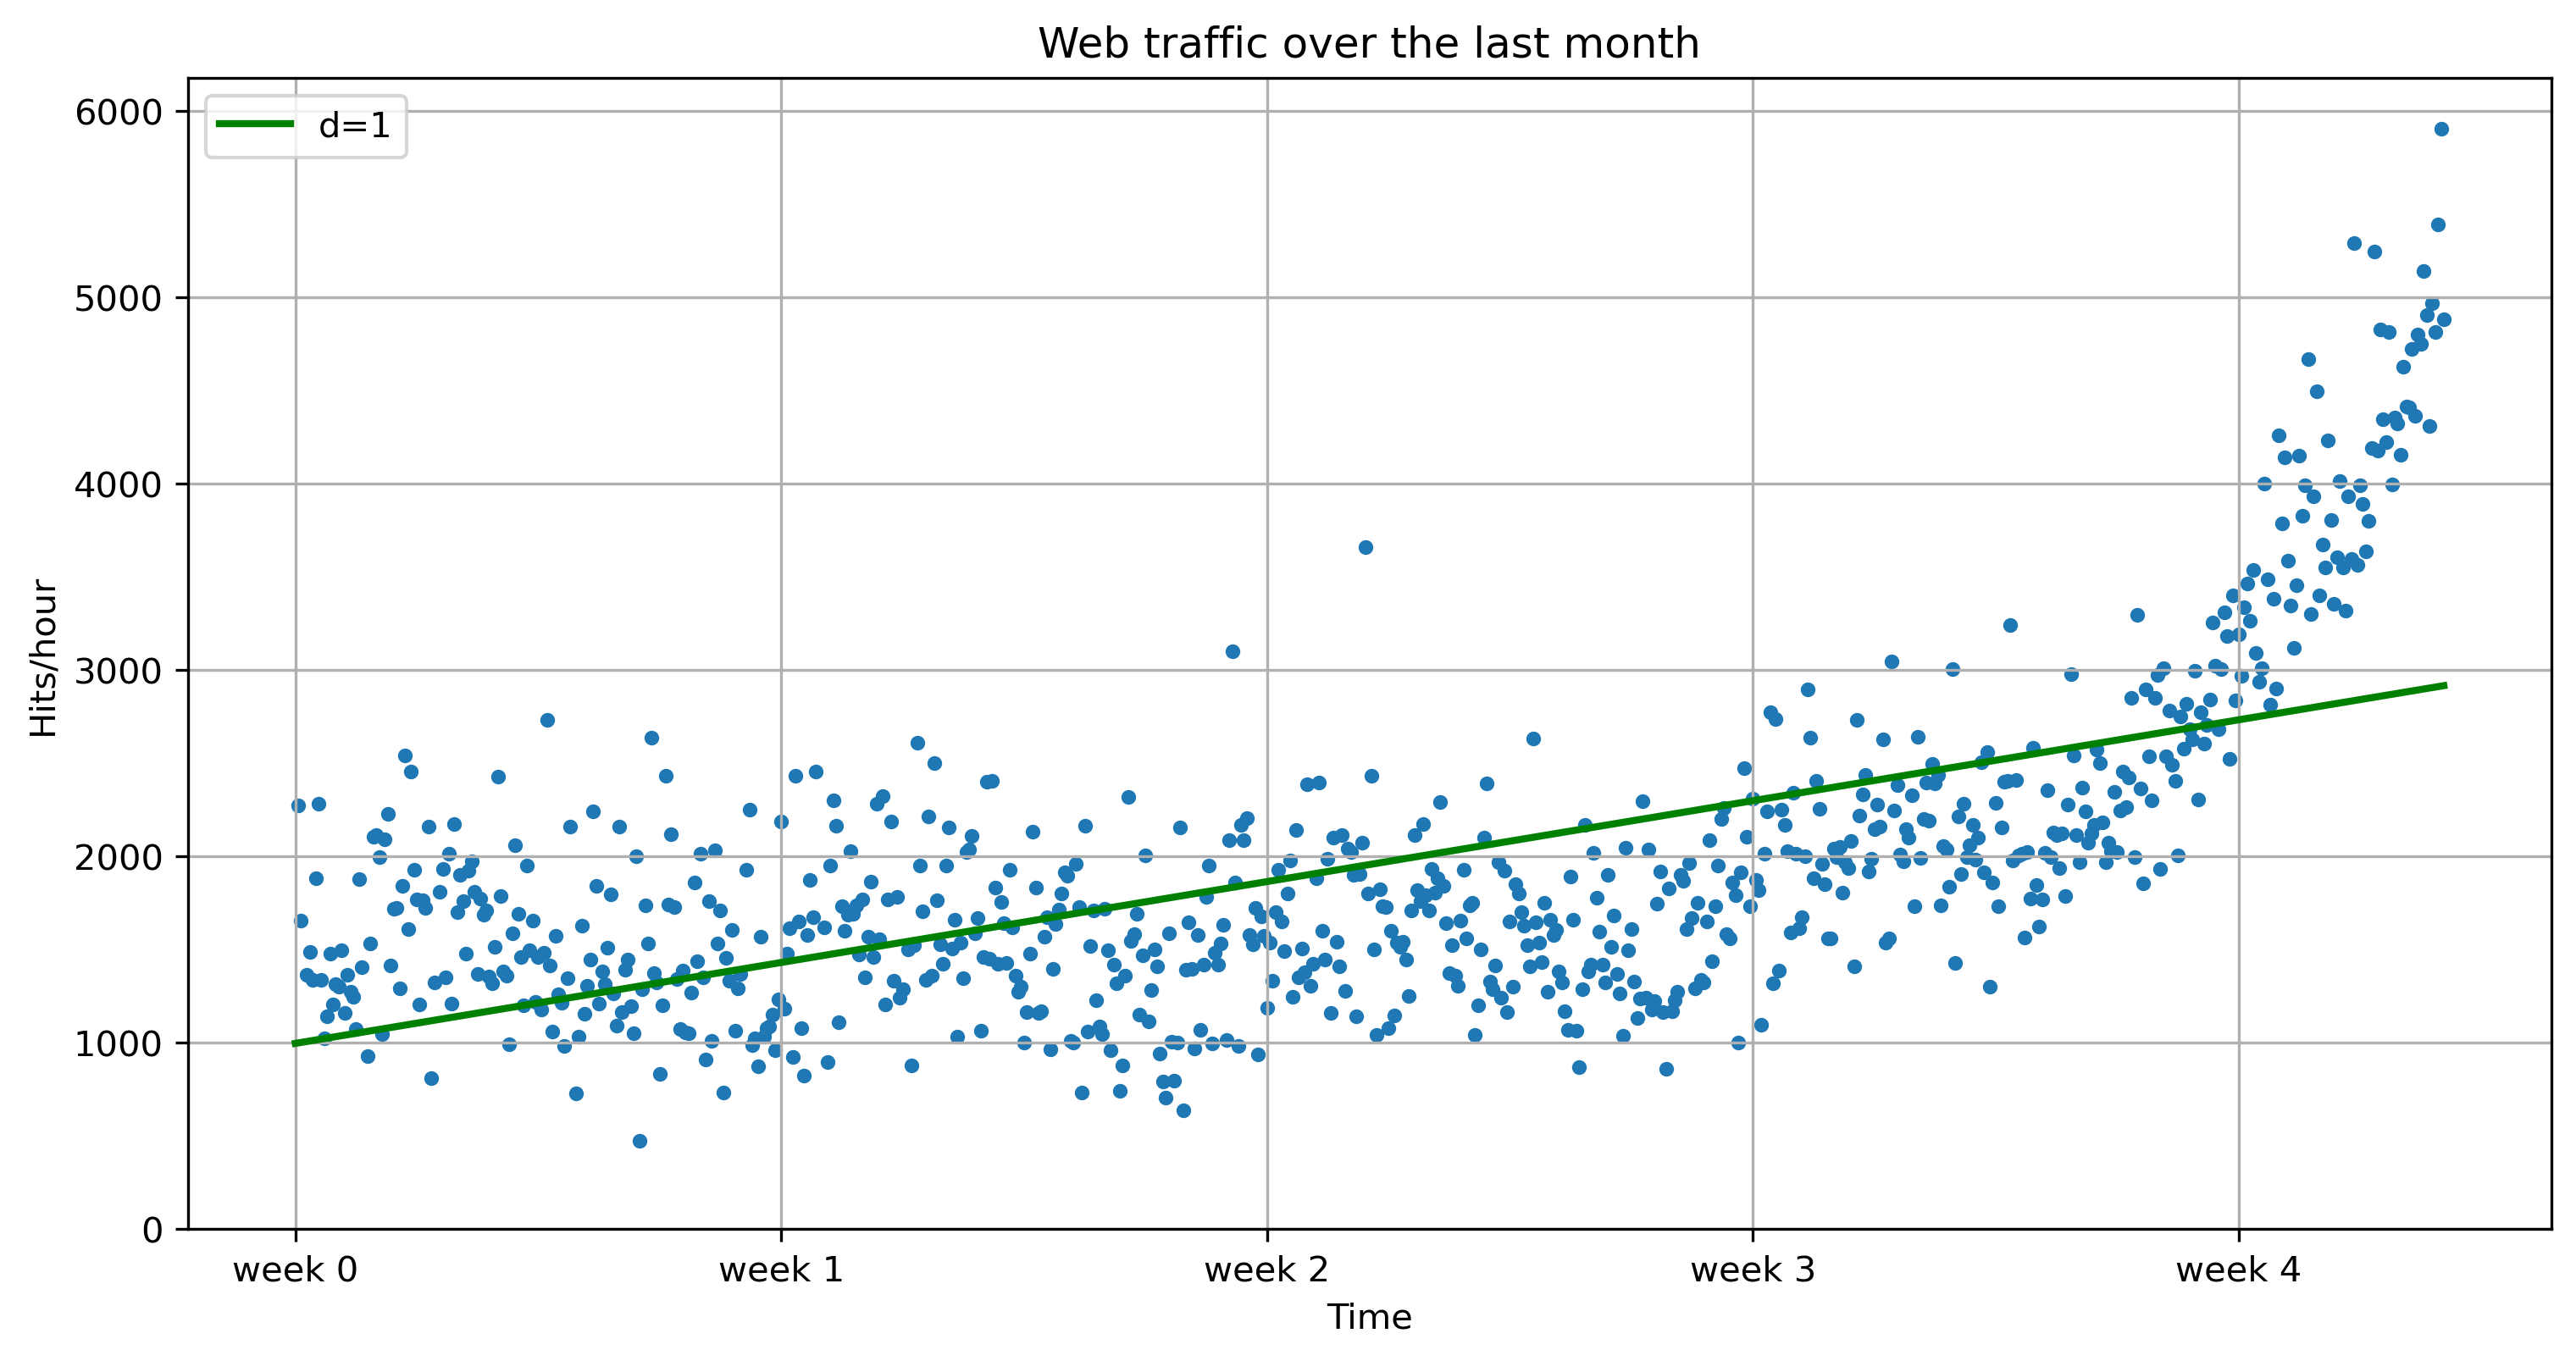

In [51]:
plot_web_traffic(x, y, [f1], fig_idx="02")

# Toward more complex models

In [52]:
f2p = np.polyfit(x, y, 2)

In [53]:
print(f2p)

[ 1.05605675e-02 -5.29774287e+00  1.98466917e+03]


In [54]:
f2 = np.poly1d(f2p)

In [55]:
print(error(f2, x, y))

181347660.76423597


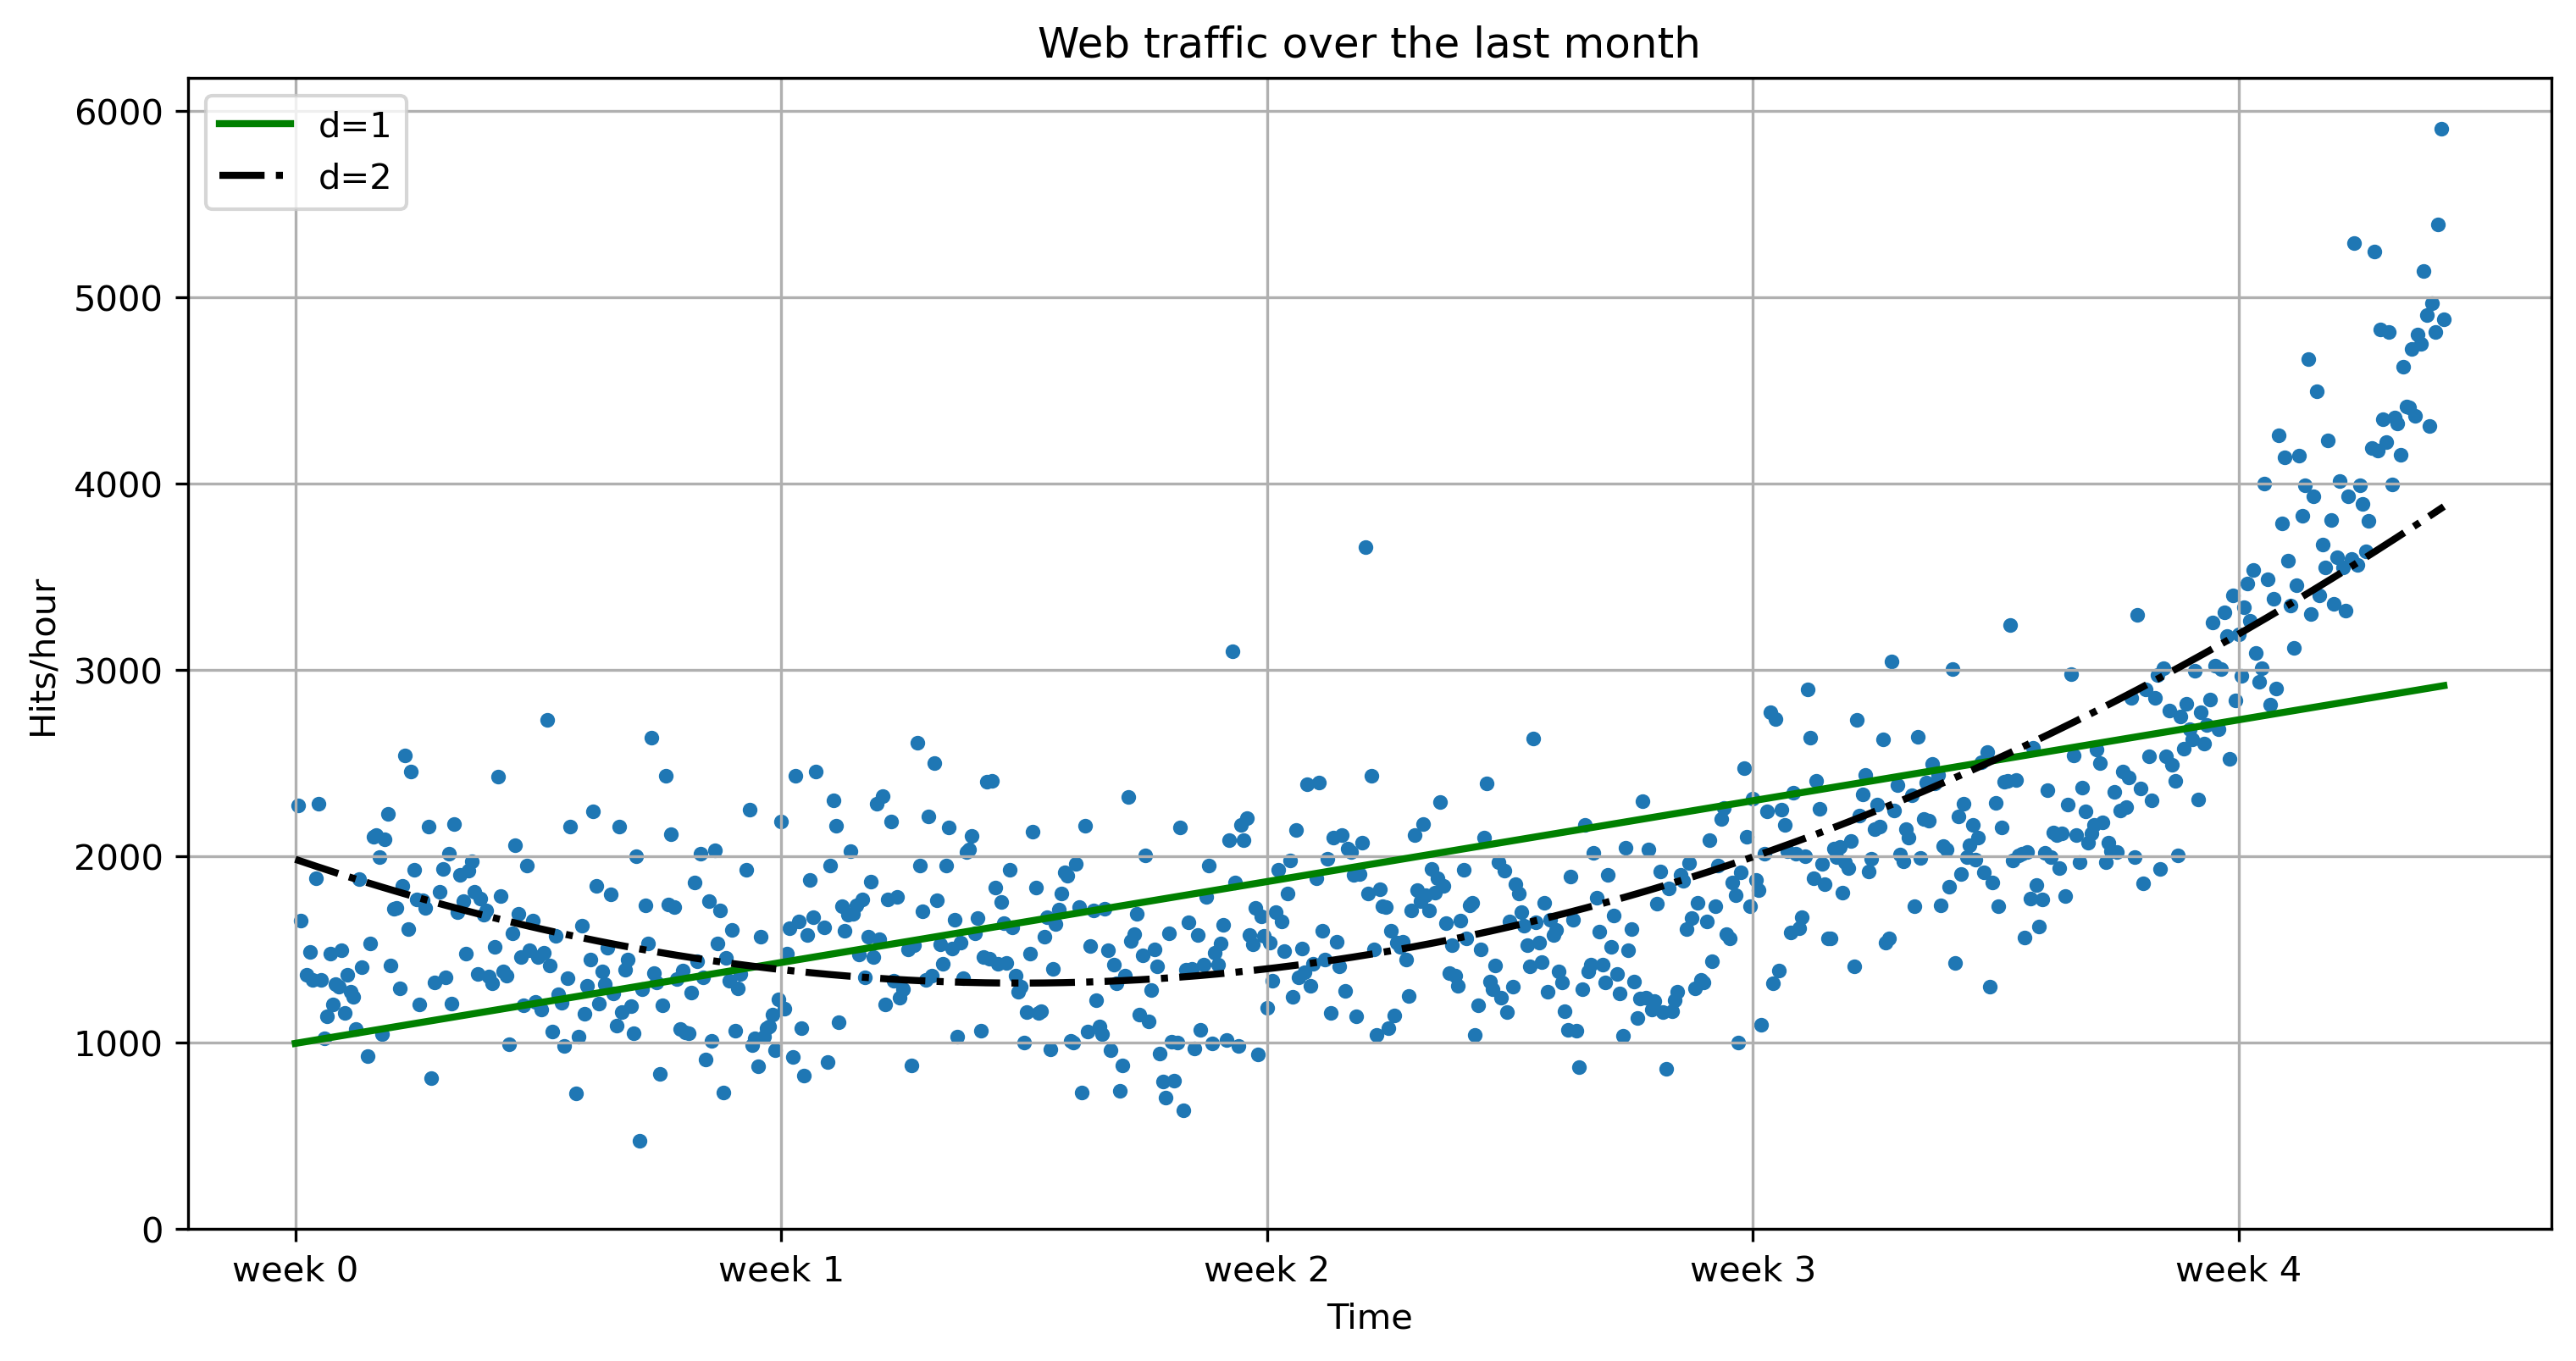

In [56]:
plot_web_traffic(x, y, [f1, f2], fig_idx="03")

In [57]:
f3 = np.poly1d(np.polyfit(x, y, 3))
f10 = np.poly1d(np.polyfit(x, y, 10))
f100 = np.poly1d(np.polyfit(x, y, 100))

/opt/anaconda/lib/python3.9/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/opt/anaconda/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


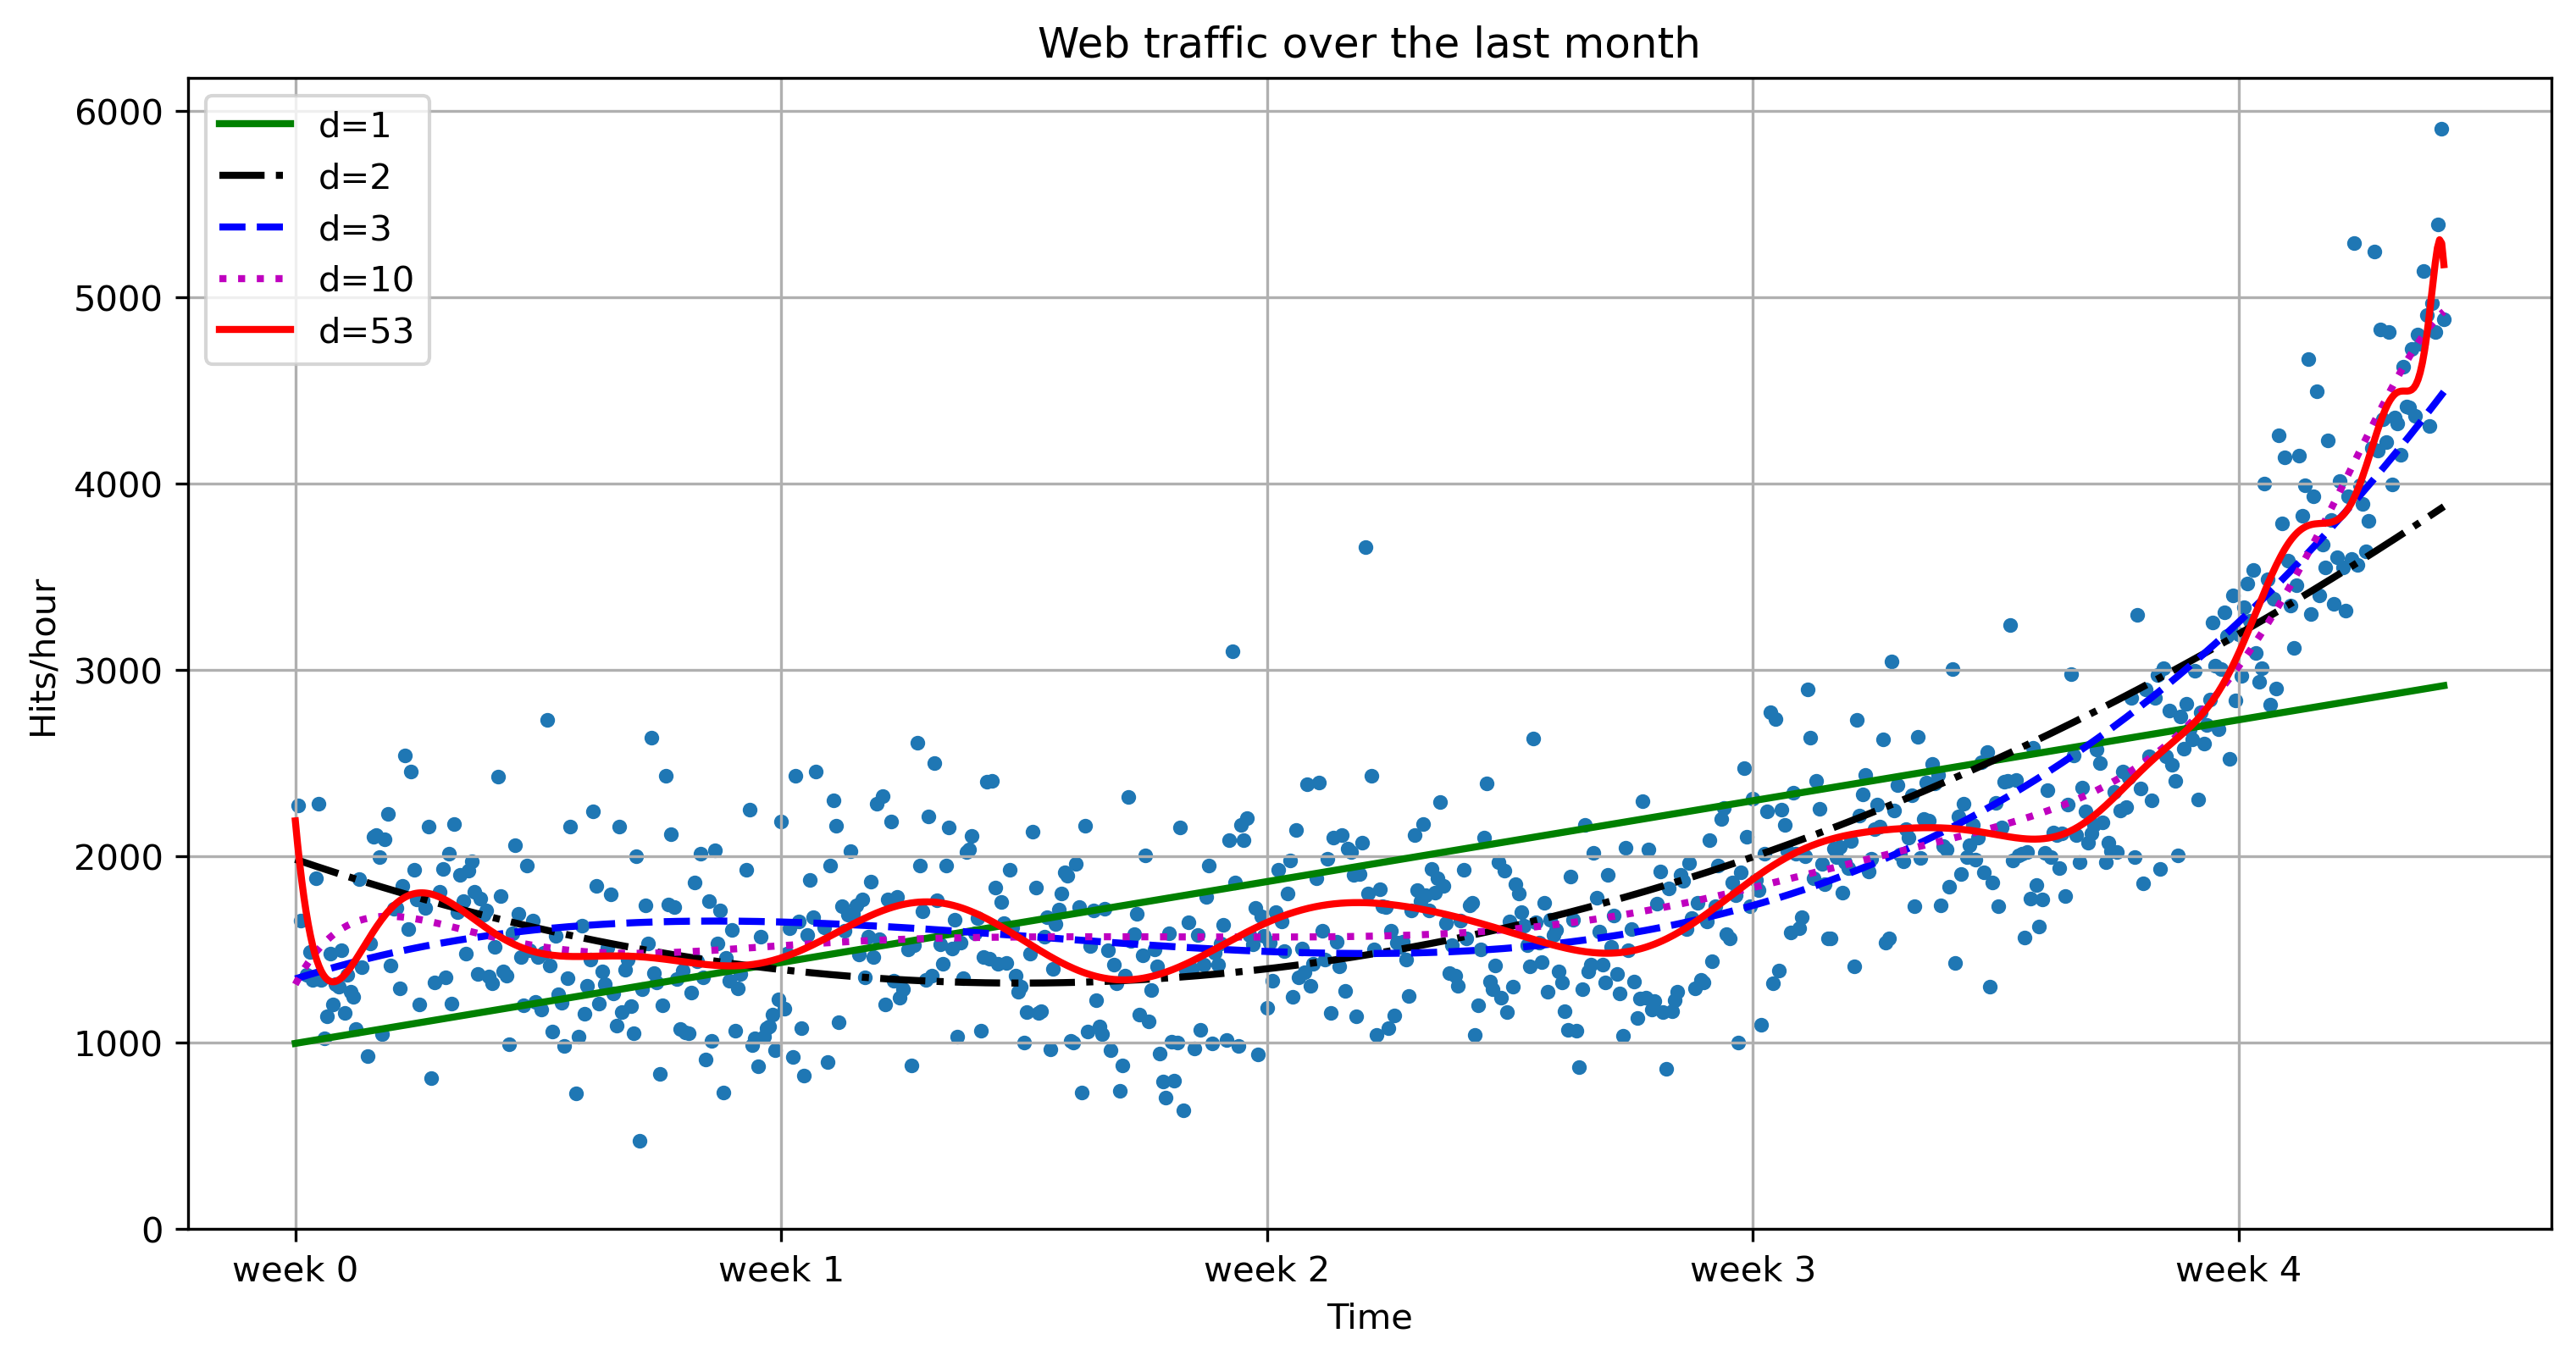

In [58]:
plot_web_traffic(x, y, [f1, f2, f3, f10, f100], fig_idx="04")

In [59]:
print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("\td=%i: %f" % (f.order, error(f, x, y)))

Errors for the complete data set:
	d=1: 319531507.008126
	d=2: 181347660.764236
	d=3: 140576460.879141
	d=10: 123426935.754277
	d=53: 110768265.091659


In [60]:
from ipywidgets import interactive
import ipywidgets as widgets

def play_with_dim(dim=1):
    f = np.poly1d(np.polyfit(x, y, dim))
    plot_web_traffic(x, y, [f])
    print("Error for d=%i: %f" % (f.order, error(f, x, y)))
    
interactive_plot = interactive(play_with_dim, dim=(1,100))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(IntSlider(value=1, description='dim', min=1), Output(layout=Layout(height='500px'))), _d…

In [61]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=134390576.310656


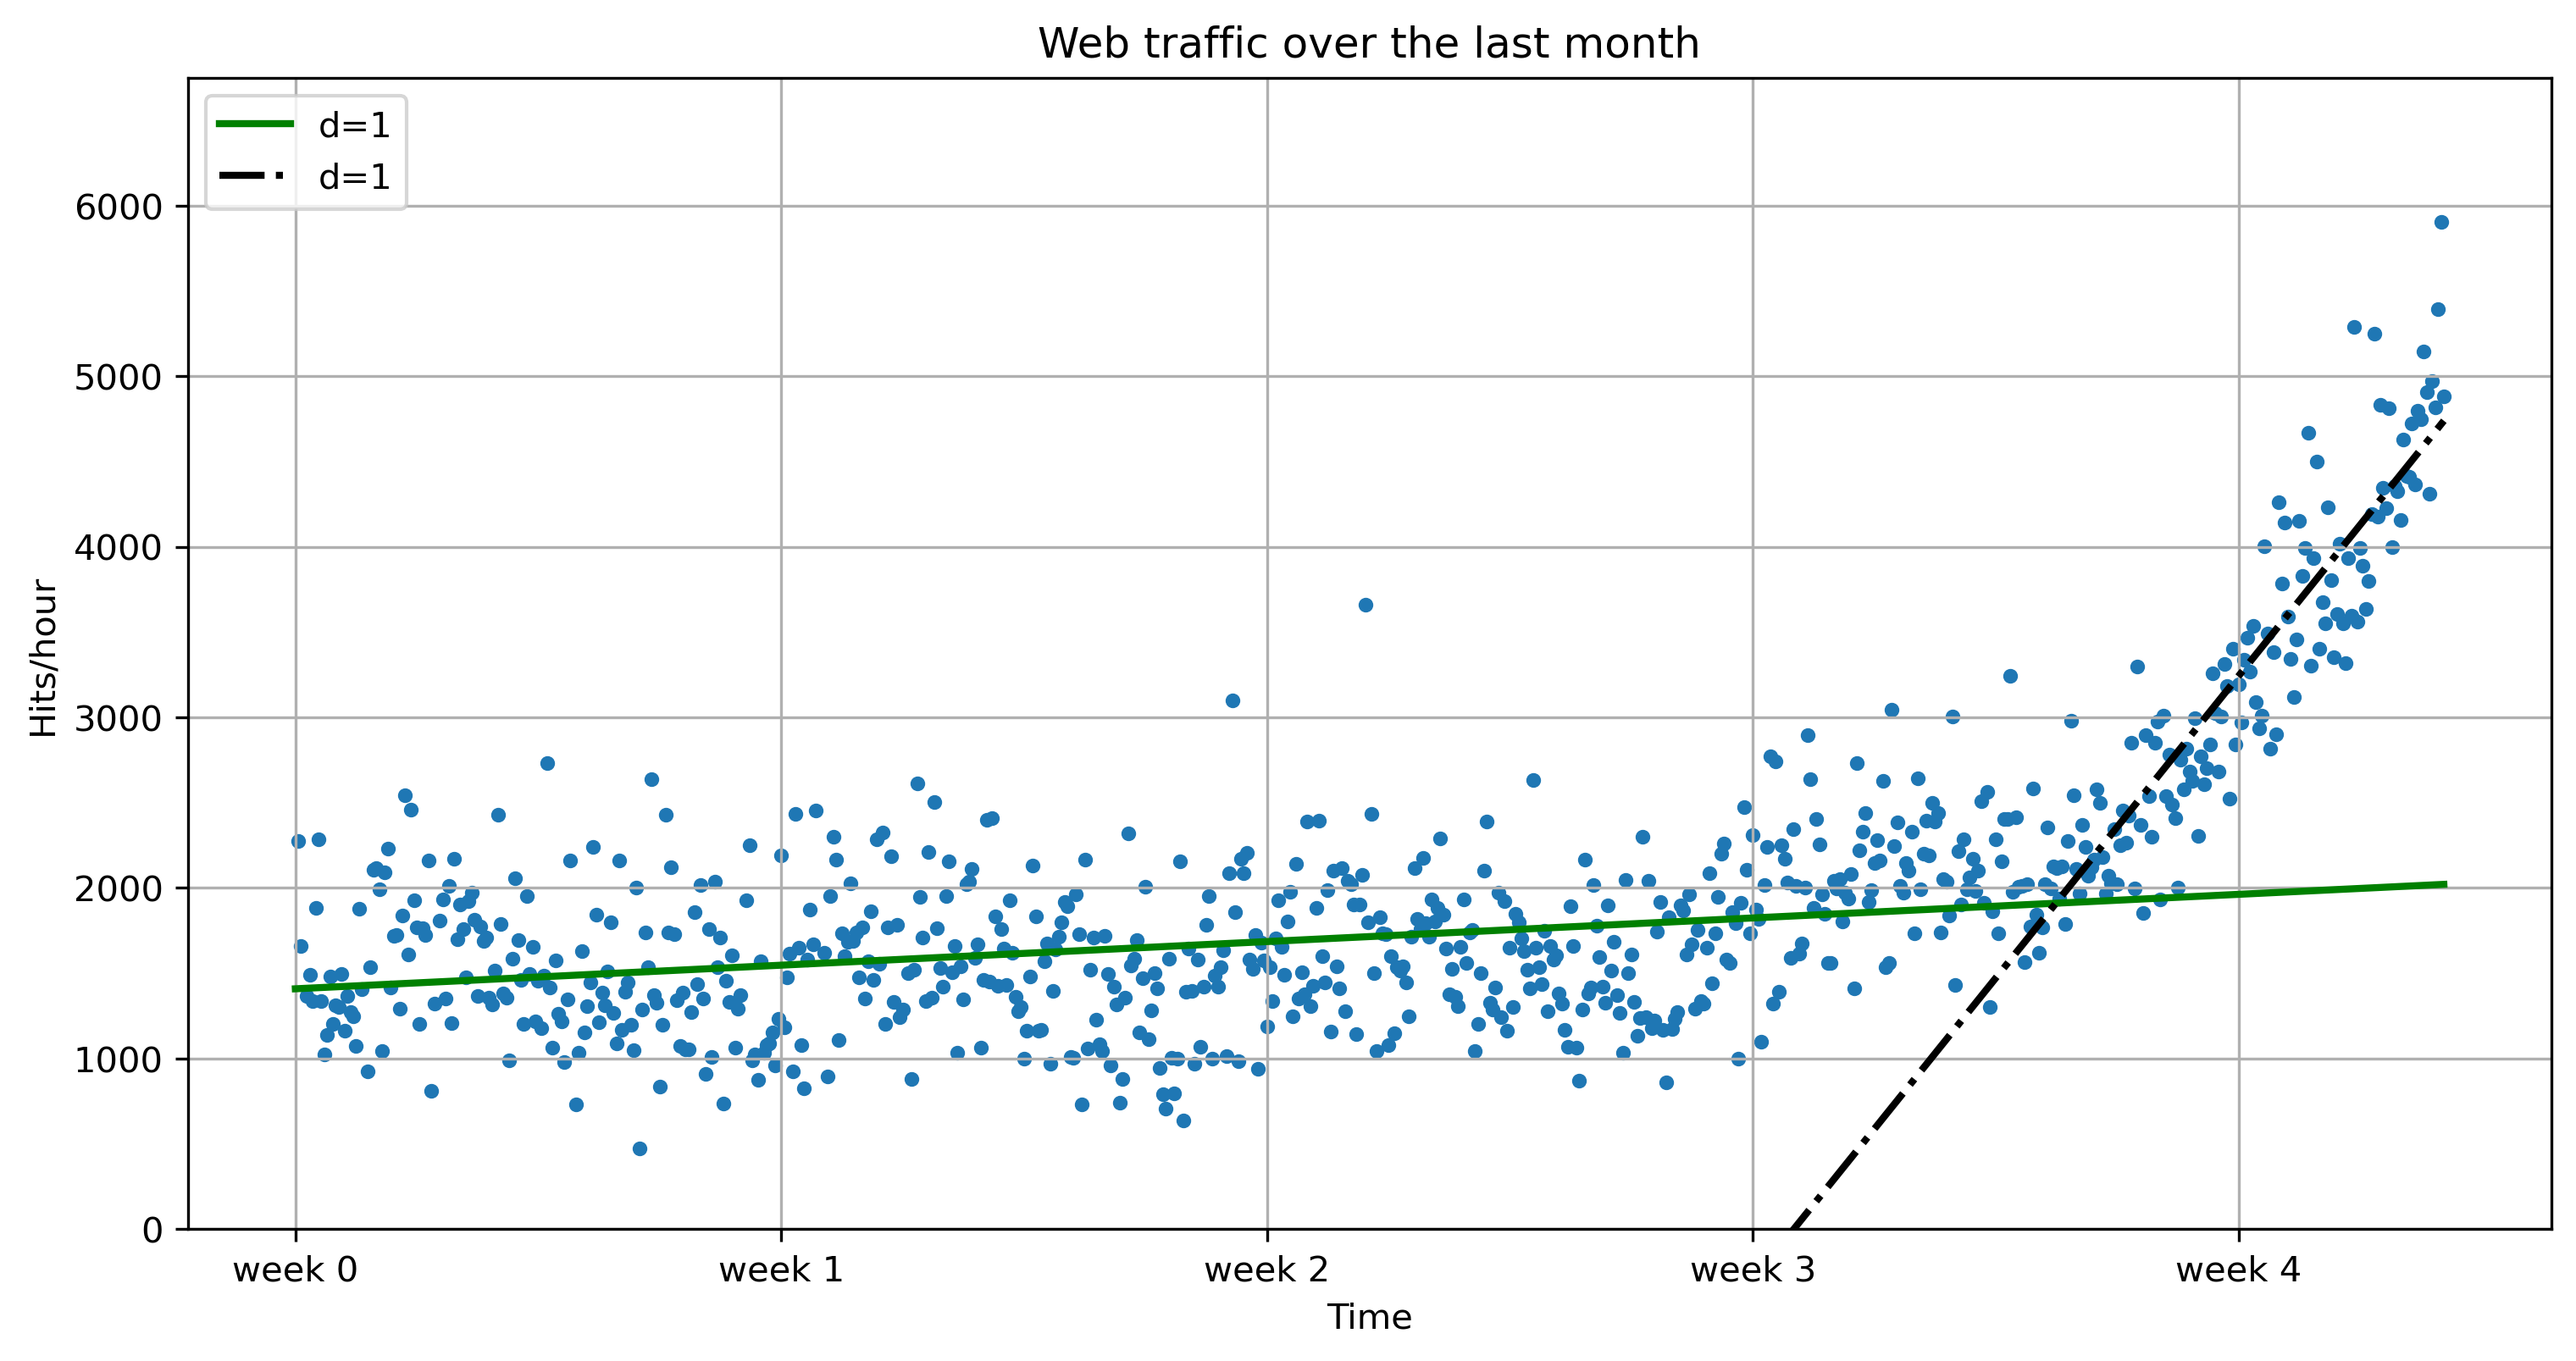

In [62]:
fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))

plot_web_traffic(x, y, [fa, fb], fig_idx="05")

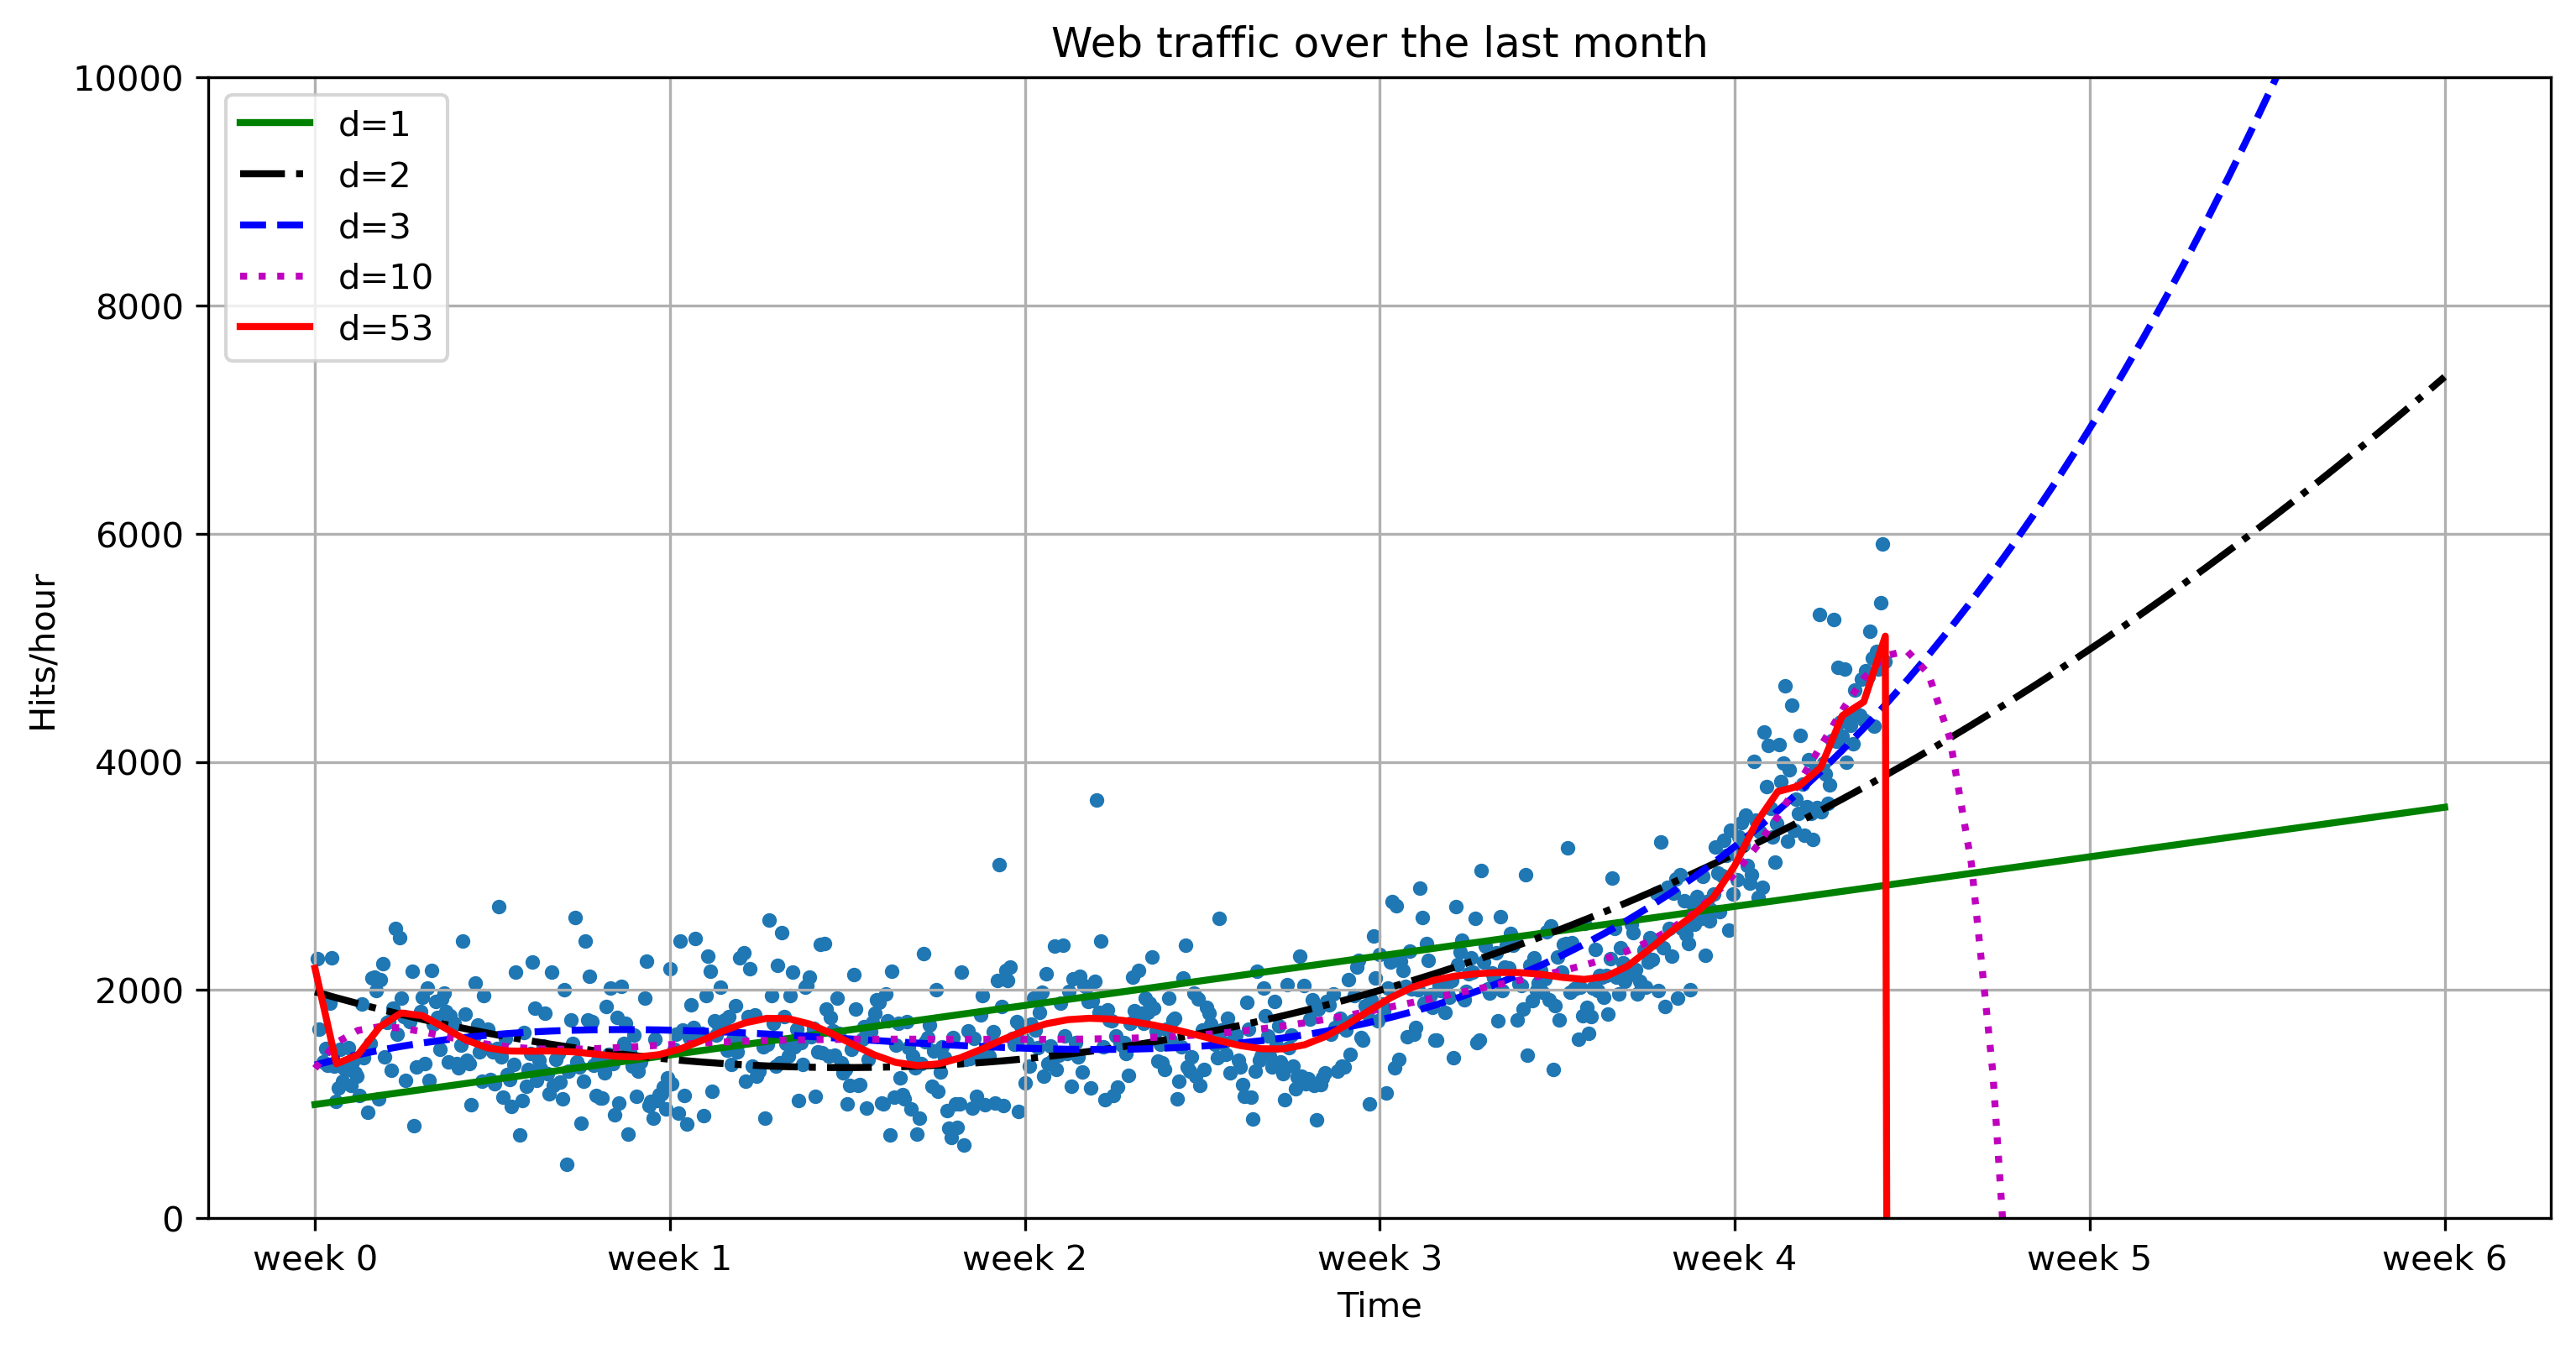

In [63]:
plot_web_traffic(x, y, [f1, f2, f3, f10, f100],
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000,
    fig_idx="06")

/opt/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda/lib/python3.9/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/opt/anaconda/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errors for only the time after inflection point
	d=1: 22140590.598233
	d=2: 19764355.660080
	d=3: 19762196.404203
	d=10: 18942545.410621
	d=53: 18293763.930544


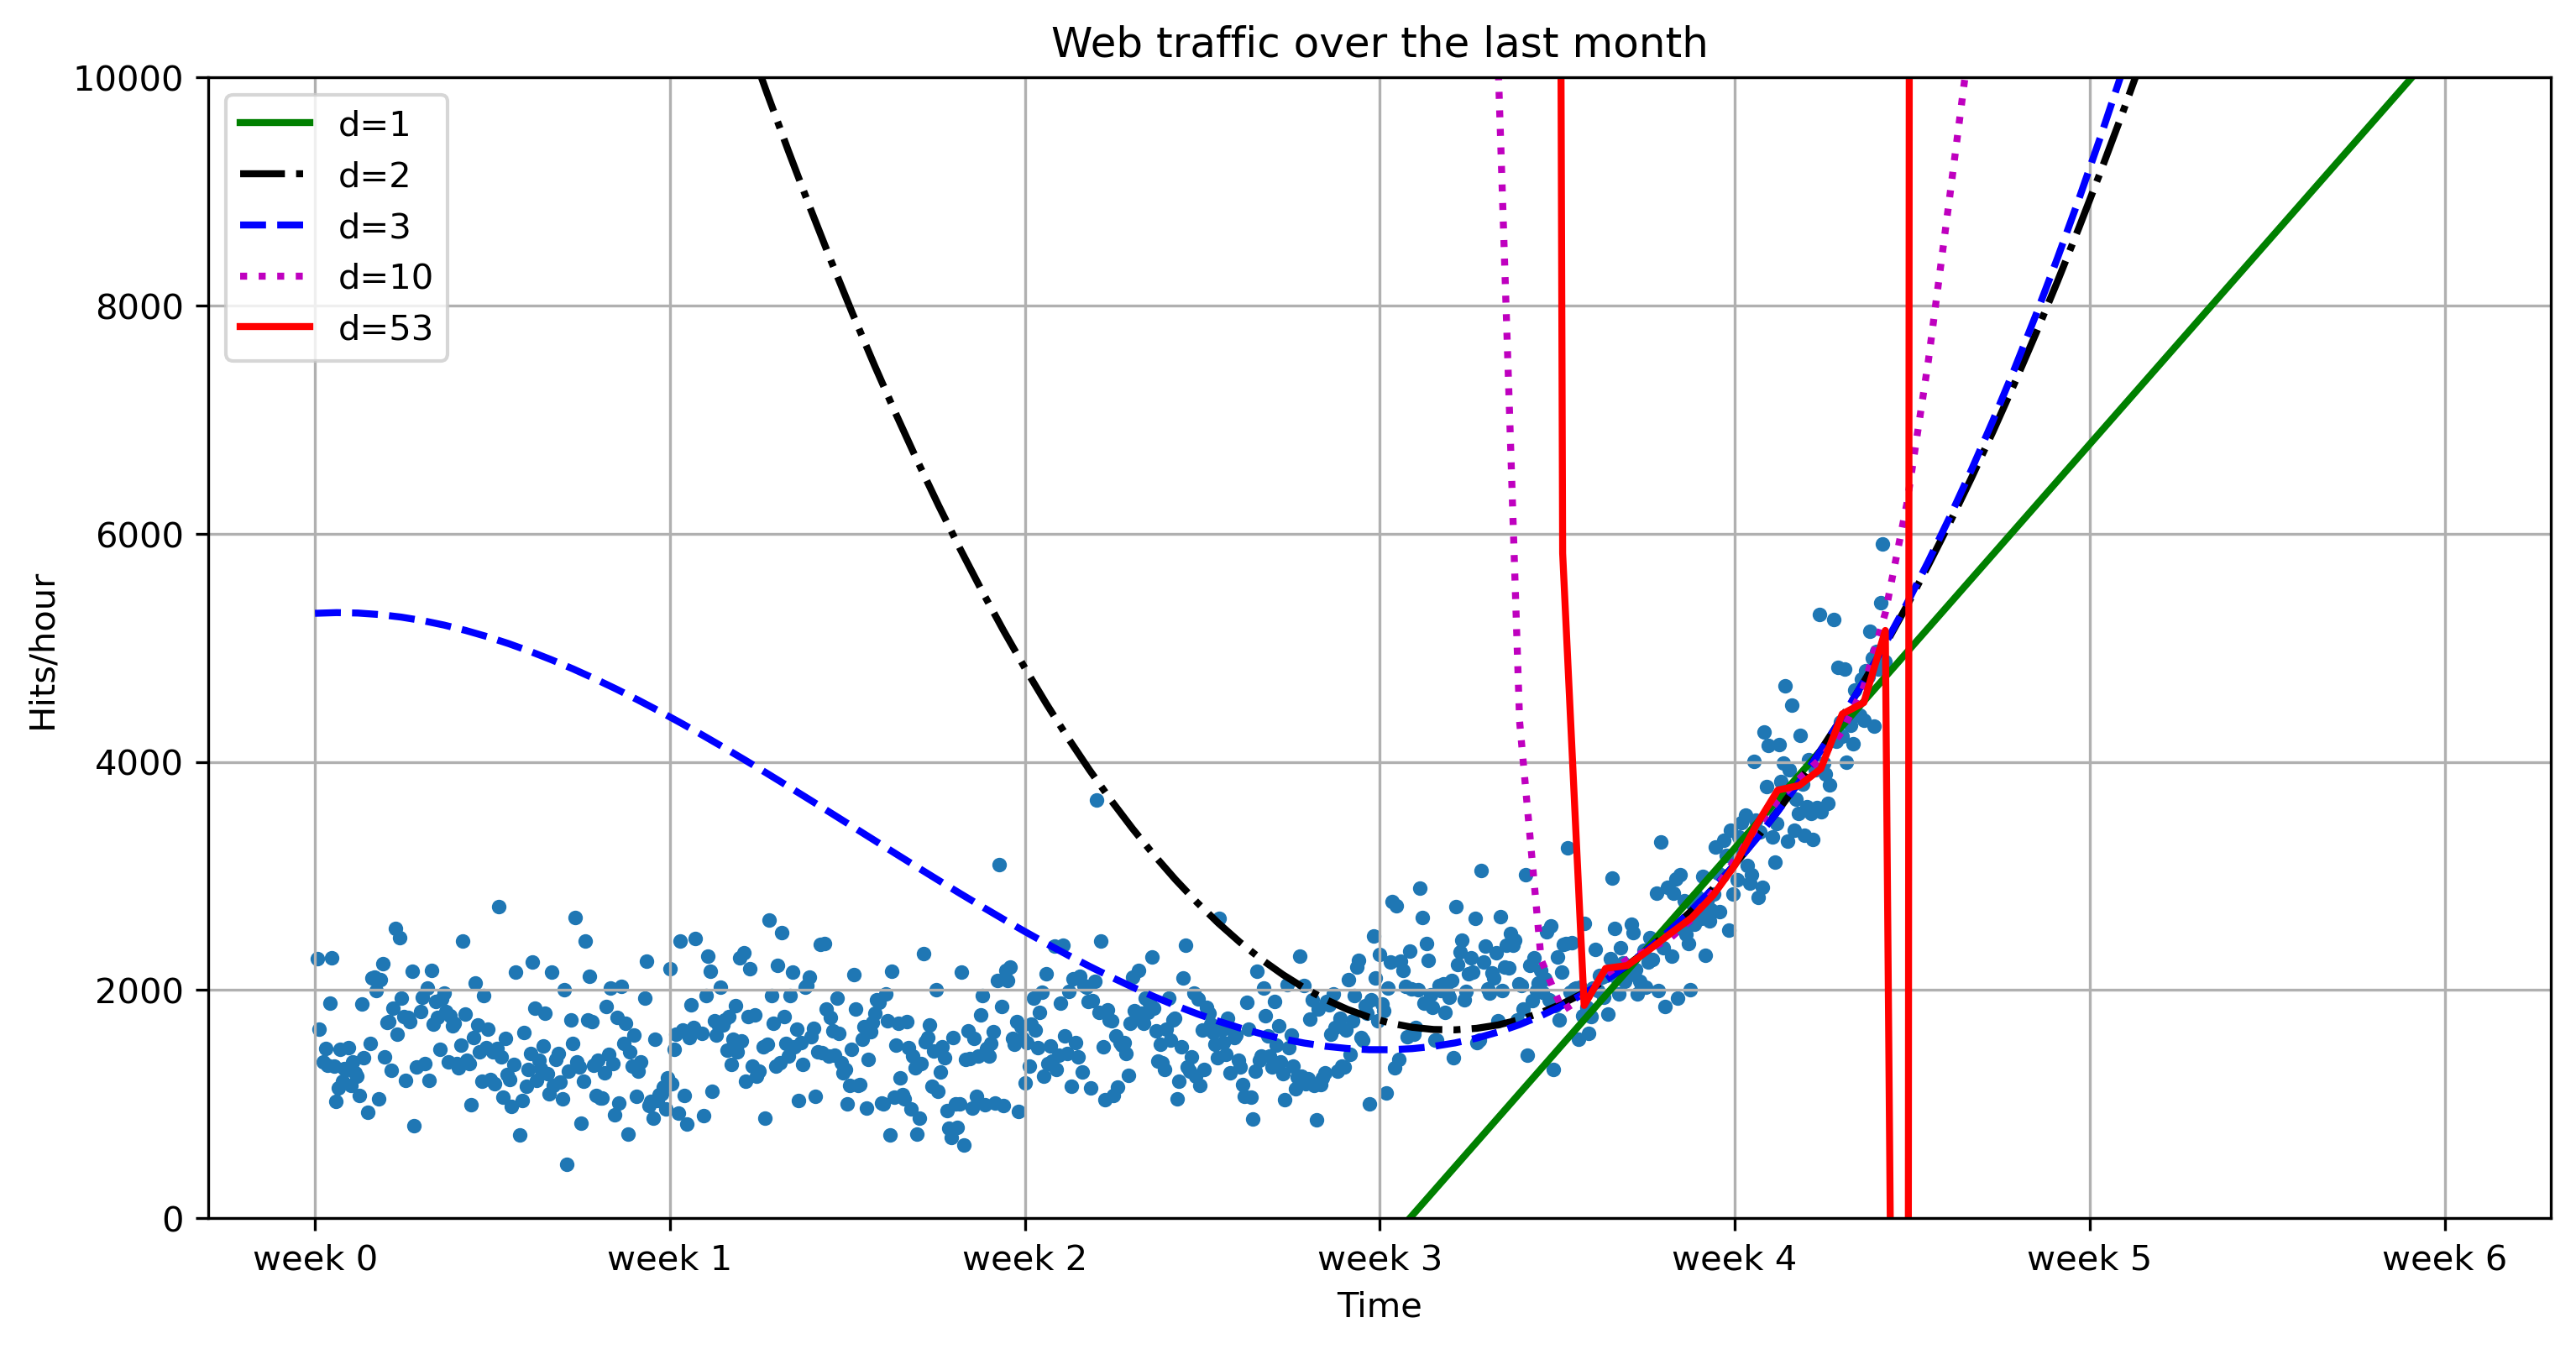

In [64]:
fb1 = np.poly1d(np.polyfit(xb, yb, 1))
fb2 = np.poly1d(np.polyfit(xb, yb, 2))
fb3 = np.poly1d(np.polyfit(xb, yb, 3))
fb10 = np.poly1d(np.polyfit(xb, yb, 10))
fb100 = np.poly1d(np.polyfit(xb, yb, 100))

print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("\td=%i: %f" % (f.order, error(f, xb, yb)))

plot_web_traffic(
    x, y, [fb1, fb2, fb3, fb10, fb100],    
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000,
    fig_idx="07")

In [65]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = np.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = np.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = np.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = np.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = np.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

fbt2(x)= 
         2
0.05404 x - 50.39 x + 1.262e+04
fbt2(x)-100,000= 
         2
0.05404 x - 50.39 x - 8.738e+04
Test errors for only the time after inflection point
Error d=1: 6492812.705336
Error d=2: 5008335.504620
Error d=3: 5006519.831510
Error d=10: 5440887.312585
Error d=53: 5369500.475302


/opt/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda/lib/python3.9/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/opt/anaconda/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


# Training and testing

Errors for only the time after inflection point
	d=1: 22140590.598233
	d=2: 19764355.660080
	d=3: 19762196.404203
	d=10: 18942545.410621
	d=53: 18293763.930544


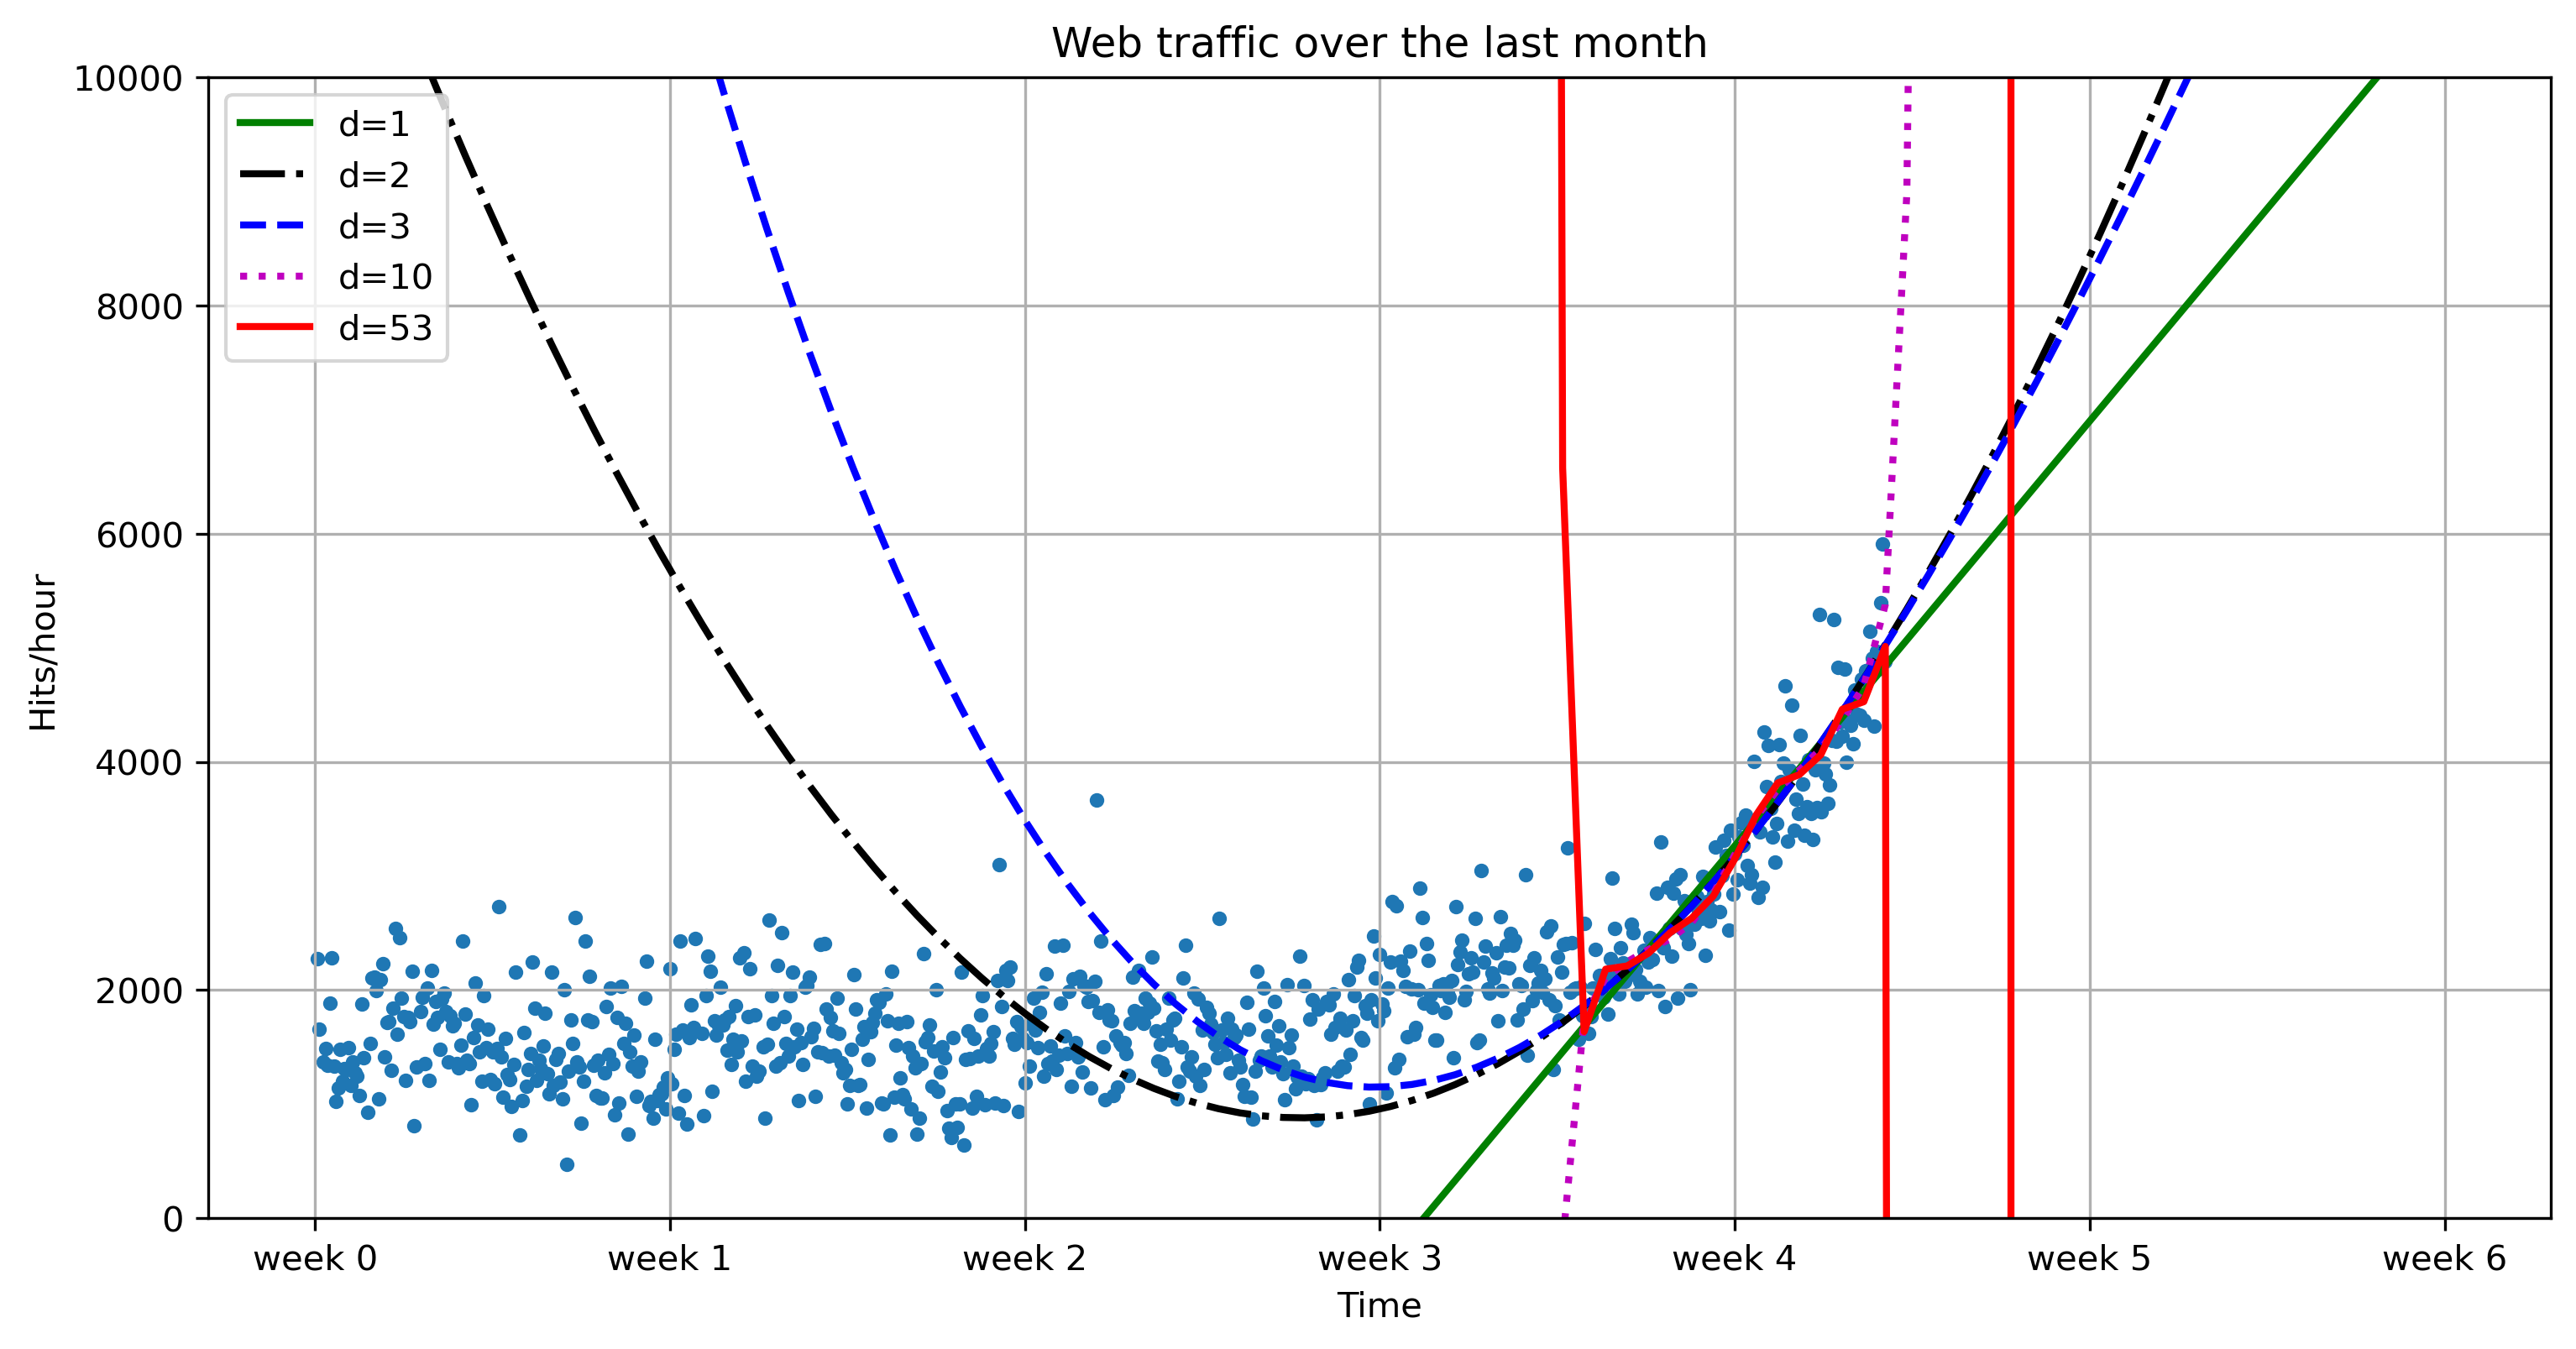

In [66]:
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("\td=%i: %f" % (f.order, error(f, xb, yb)))

plot_web_traffic(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],    
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000,
    fig_idx="08")

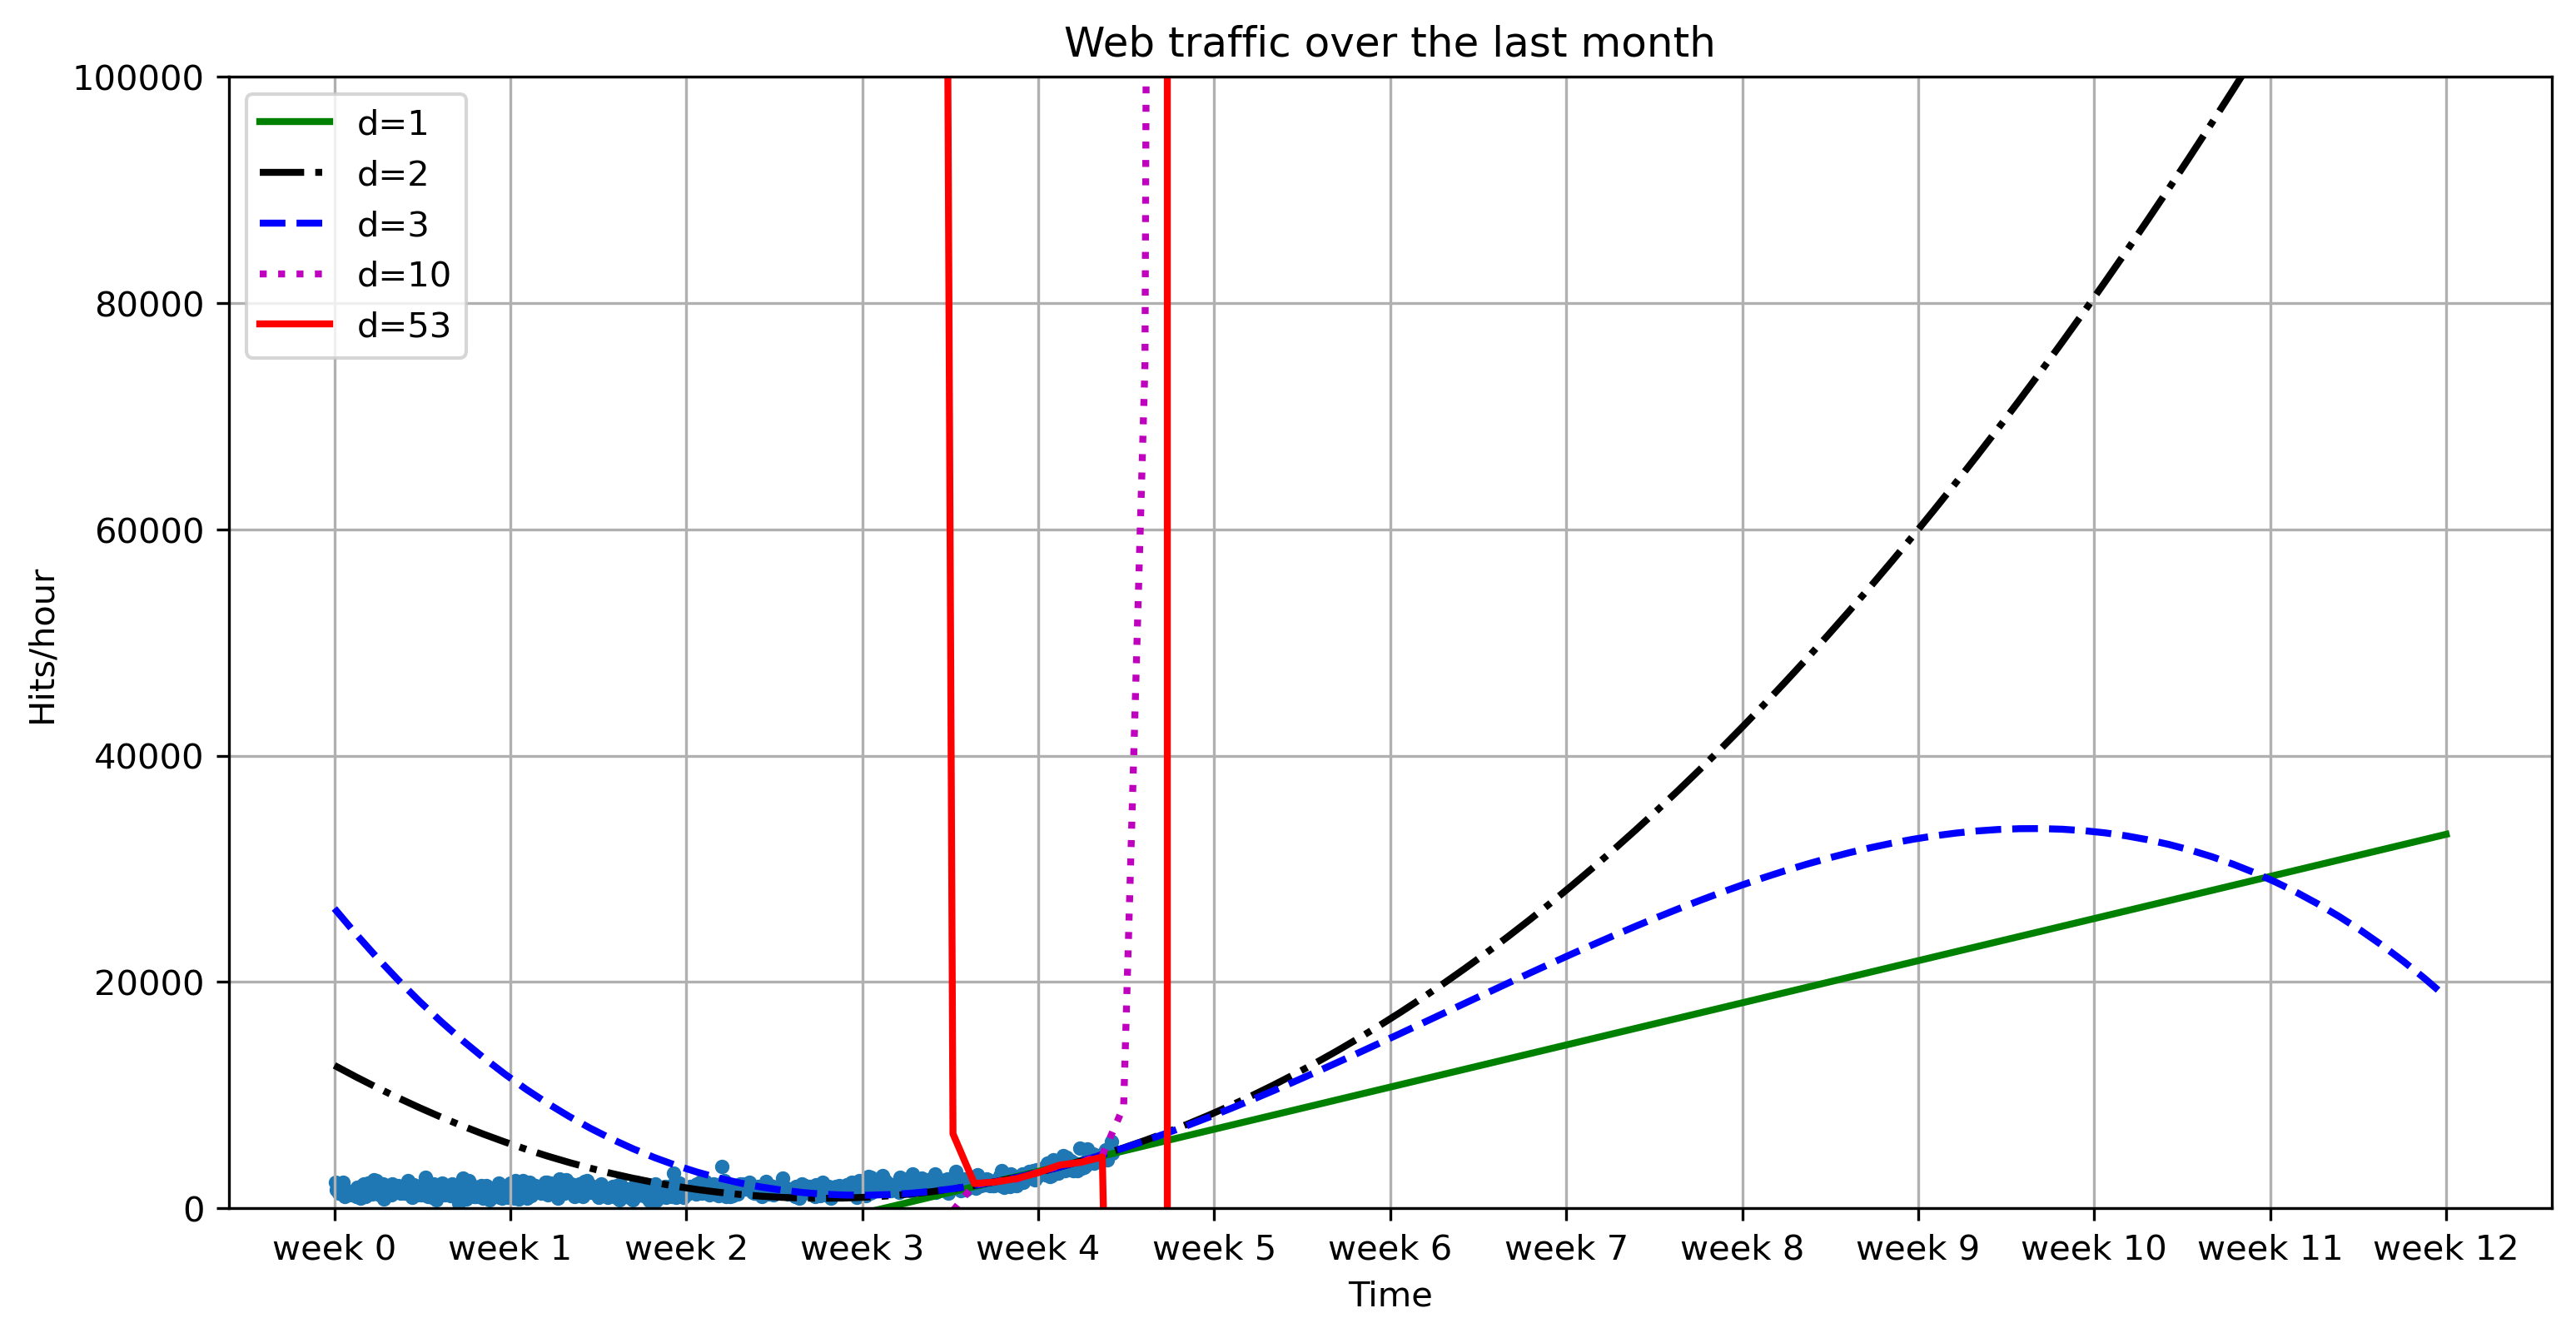

In [67]:
plot_web_traffic(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],    
    mx=np.linspace(0, 12 * 7 * 24, 100),
    ymax=100000,
    fig_idx="09")

In [68]:
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

fbt2(x)= 
         2
0.05404 x - 50.39 x + 1.262e+04
fbt2(x)-100,000= 
         2
0.05404 x - 50.39 x - 8.738e+04
100,000 hits/hour expected at week 10.836350
